In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
from pandas.plotting import scatter_matrix 
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.stats.outliers_influence import OLSInfluence
%matplotlib inline
plt.style.use('ggplot')

In [3]:
np.random.seed(0)
x1=np.random.random(100)
x2=0.5*x1+np.random.randn(100)/10
y=2+2*x1+0.3*x2+np.random.randn(100)

correlation [[1.         0.81926336]
 [0.81926336 1.        ]]


array([[<AxesSubplot:xlabel='y', ylabel='y'>,
        <AxesSubplot:xlabel='x1', ylabel='y'>,
        <AxesSubplot:xlabel='x2', ylabel='y'>],
       [<AxesSubplot:xlabel='y', ylabel='x1'>,
        <AxesSubplot:xlabel='x1', ylabel='x1'>,
        <AxesSubplot:xlabel='x2', ylabel='x1'>],
       [<AxesSubplot:xlabel='y', ylabel='x2'>,
        <AxesSubplot:xlabel='x1', ylabel='x2'>,
        <AxesSubplot:xlabel='x2', ylabel='x2'>]], dtype=object)

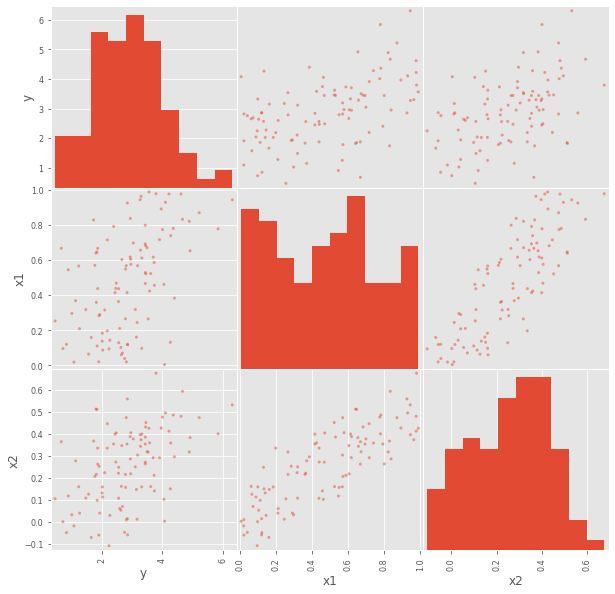

In [4]:
corr=np.corrcoef(x1,x2)
print('correlation',corr)
df=pd.DataFrame({'y':y,'x1':x1,'x2':x2})
scatter_matrix(df, figsize=(10,10),alpha=0.5)

In [5]:
X=sm.add_constant(df[['x1','x2']])
model=sm.OLS(y,X)
est=model.fit()
print(est.summary())
# beta0 is 1.9217 , beta1 is 1.2007 and beta2 is 1.4931 while reale values are 2,2 and 0.3 respectively
# based on p values the null hypothesis fo const beta2 cannot be rejected.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     17.16
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           4.16e-07
Time:                        11:28:46   Log-Likelihood:                -139.04
No. Observations:                 100   AIC:                             284.1
Df Residuals:                      97   BIC:                             291.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9217      0.191     10.071      0.0

In [7]:
X1=sm.add_constant(x1)
model1=sm.OLS(y,X1)
est1=model1.fit()
print(est1.summary())
# null hypothesis has to be rejected for beta1

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     31.64
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.76e-07
Time:                        11:30:02   Log-Likelihood:                -140.20
No. Observations:                 100   AIC:                             284.4
Df Residuals:                      98   BIC:                             289.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9548      0.191     10.247      0.0

In [11]:
X2=sm.add_constant(x2)
model2=sm.OLS(y,X2)
est2=model2.fit()
print(est2.summary())
# null hypothesis has to be rejected for beta2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     29.37
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           4.29e-07
Time:                        11:58:44   Log-Likelihood:                -141.09
No. Observations:                 100   AIC:                             286.2
Df Residuals:                      98   BIC:                             291.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0721      0.178     11.623      0.0

In [10]:
df2=pd.DataFrame({'y':[6],'x1':[0.1],'x2':[0.8]})
df=df.append(df2)
X_both=sm.add_constant(df.iloc[:,1:])

# model with x1and x2
est_both=sm.OLS(df['y'],X_both).fit()
print(est_both.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     22.12
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.15e-08
Time:                        11:30:20   Log-Likelihood:                -144.56
No. Observations:                 102   AIC:                             295.1
Df Residuals:                      99   BIC:                             303.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9605      0.195     10.033      0.0

In [38]:
# model with x1
print(sm.OLS(df['y'],sm.add_constant(df['x1'])).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     23.57
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           4.50e-06
Time:                        17:34:09   Log-Likelihood:                -148.13
No. Observations:                 101   AIC:                             300.3
Df Residuals:                      99   BIC:                             305.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0719      0.201     10.315      0.0

In [39]:
# model with x2
print(sm.OLS(df['y'],sm.add_constant(df['x2'])).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     36.88
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           2.33e-08
Time:                        17:34:13   Log-Likelihood:                -142.93
No. Observations:                 101   AIC:                             289.9
Df Residuals:                      99   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0255      0.176     11.531      0.0